# Defining the most profitable tariff plan for telecom operator


## Data upload

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_messages=pd.read_csv('/datasets/messages.csv')
df_tariffs=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

In [2]:
df_calls.sample(5)

,id,call_date,duration,user_id
62877,1158_435,2018-09-22,0.00,1158
172170,1425_782,2018-04-12,7.76,1425
196447,1481_254,2018-05-26,14.94,1481
154165,1381_1040,2018-02-12,16.52,1381
70710,1176_490,2018-03-28,2.07,1176


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_internet.sample(5)

,Unnamed: 0,id,mb_used,session_date,user_id
142602,142602,1477_499,332.55,2018-12-30,1477
65361,65361,1224_7,518.69,2018-05-13,1224
117196,117196,1394_154,0.00,2018-09-15,1394
139650,139650,1469_38,872.76,2018-11-27,1469
149330,149330,1499_91,640.11,2018-10-09,1499


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
df_messages.sample(5)

,id,message_date,user_id
93206,1382_667,2018-06-22,1382
26235,1110_100,2018-05-19,1110
87527,1364_261,2018-11-02,1364
3722,1014_339,2018-11-27,1014
98845,1403_369,2018-06-22,1403


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
237,1237,43,NaN,Москва,Алина,Кошелева,2018-11-04,smart
464,1464,44,NaN,Саранск,Антонина,Авросинова,2018-02-17,smart
472,1472,53,NaN,Ярославль,Наида,Боброва,2018-01-18,smart
443,1443,21,NaN,Казань,Иван,Афинин,2018-09-17,smart
385,1385,26,NaN,Москва,Алиса,Дубинина,2018-01-13,ultra


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [13]:
display(df_users['city'].value_counts().head(10))
#choose 10 cities with the largest number of users

Москва              99
Санкт-Петербург     39
Новосибирск         16
Казань              14
Омск                14
Уфа                 12
Ульяновск           11
Краснодар           11
Набережные Челны    11
Екатеринбург        11
Name: city, dtype: int64

Most of the users are from Moscow ("Москва") - a fifth of the data. Then St. Petersburg ("Санкт-Петербург") and other regional centers go by a large margin.

In [14]:
df_users.duplicated().sum()

0

### Conclusion

The data is obtained from several sources, probably they will have to be combined by the user_id identifier. The call number is formed as "user ID+ call number". There are missed values in the churn_rate column in the "users" upload, which means that the tariff was still valid at the time of data withdrawal. In all tables, columns with dates have the object data type, in order to be able to work with them in the future, you will need to convert these columns to the datetime64 data type.

## Data preprocessing

Let's transform the dataframes to "user - month - sum_duration" view and combine them by "user_id".

### Changing data types

In [15]:
for df in [df_calls, df_internet, df_messages, df_users]:
    for column in df:
        if 'date' in column:
            df[column] = pd.to_datetime(df[column], yearfirst=True)

In [16]:
for df in [df_calls, df_internet, df_messages]:
    for column in df:
        if 'date' in column:
            df['month'] = pd.DatetimeIndex(df[column]).month

The terms of the project say: each call is rounded separately: even if it lasted only 1 second, it will be counted as 1 minute. Let's make the necessary rounding inside the df_calls dataframe before summing up the duration of calls by users in the context of months.

In [17]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [18]:
df_calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [19]:
df_calls_new=df_calls.groupby(['user_id','month']).agg(sum_duration=('duration','sum')).reset_index()
df_internet_new=df_internet.groupby(['user_id','month']).agg(sum_mb_used=('mb_used','sum')).reset_index()
df_messages_new=df_messages.groupby(['user_id','month']).agg(sms=('id','count')).reset_index()

#calculate the duration of calls, the amount of Internet and SMS in each month for each user

In [20]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'}) 

df_alldata = (((df_calls_new.merge(df_internet_new, how='outer', on=['user_id', 'month'])).merge(df_messages_new, how='outer', on=['user_id', 'month'])).merge(df_users, how='outer', on=['user_id'])).merge(df_tariffs, how='outer', on=['tariff'])


The terms of the project say: for web traffic, individual sessions are not considered. Instead, the total amount for the month is rounded up. If a subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes (2000 megabytes). We will translate the data on the use of Internet traffic into gigabytes, and make the necessary rounding.

In [21]:
def roundmb(mb):
    gb = np.ceil(mb/1000)
    return gb

df_alldata['sum_gb_used'] = df_alldata['sum_mb_used'].apply(roundmb)

In [22]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   sum_duration           3174 non-null   float64       
 3   sum_mb_used            3203 non-null   float64       
 4   sms                    2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    datetime64[ns]
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff                 3216 non-null   object        
 12  messages_included      3216 non-null   int64         
 13  mb_

### Filling the missed values

In [23]:
df_alldata.isnull().sum()
#look at the number of missing values in the resulting dataset

user_id                     0
month                       2
sum_duration               42
sum_mb_used                13
sms                       499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
sum_gb_used                13
dtype: int64

There are missed values in the columns sum_duration, sum_mb_used, smz, sum_gb_used. Assuming that a particular user did not use this type of service in this month, we will replace the omissions with "0". Let's move on to calculating the monthly revenue from each user. By convention, omissions in the churn_date column mean that at the time of uploading the data, the client was still a member of the tariff - we will not replace them.

In [24]:
df_alldata['sum_duration'] = df_alldata['sum_duration'].fillna(0)
df_alldata['sum_mb_used'] = df_alldata['sum_mb_used'].fillna(0)
df_alldata['sms'] = df_alldata['sms'].fillna(0)
df_alldata['sum_gb_used'] = df_alldata['sum_gb_used'].fillna(0)

#fill in the missing values with zeros

Let's see in which rows the values for the month column are missing.

In [25]:
df_alldata.query('month == "NaN"')

,user_id,month,sum_duration,sum_mb_used,sms,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used


Users came and quite in December. Replace the missing values in the "Month" column with 12.

In [26]:
df_alldata['month'] = df_alldata['month'].fillna(12) 

### Adding calculated values

In [27]:
def extra_minutes(sum_duration, minutes_included):
    if sum_duration > minutes_included:
        extra_minutes = sum_duration-minutes_included
    else:
        extra_minutes = 0
    return extra_minutes
         
df_alldata['extra_minutes'] = df_alldata.apply(lambda x: extra_minutes(x['sum_duration'],x['minutes_included']), axis=1)

#count the number of minutes in excess of the tariff package and save the received values in the extra_minutes column

In [28]:
def extra_messages(messages, messages_included):
    if messages > messages_included:
        extra_messages = messages-messages_included
    else:
        extra_messages = 0
    return extra_messages
         
df_alldata['extra_messages'] = df_alldata.apply(lambda x: extra_messages(x['sms'],x['messages_included']), axis=1)

#count the number of messages in excess of the tariff package and save the received values in the extra_messages column

In [29]:
def extra_gb(sum_gb_used, mb_per_month_included):
    if sum_gb_used > np.ceil(mb_per_month_included/1000):
        extra_gb = sum_gb_used-np.ceil(mb_per_month_included/1000)
    else:
        extra_gb = 0
    return extra_gb
         
df_alldata['extra_gb'] = df_alldata.apply(lambda x: extra_gb(x['sum_gb_used'],x['mb_per_month_included']), axis=1)

#count the number of gigabytes in excess of the tariff package and save the values obtained in the extra_gb column

In [30]:
df_alldata['revenue'] = (df_alldata.rub_monthly_fee+df_alldata.extra_minutes*df_alldata.rub_per_minute+df_alldata.extra_messages*df_alldata.rub_per_message+df_alldata.extra_gb*df_alldata.rub_per_gb)

#calculate the revenue per month for each client and save the received values in the revenue column

In [31]:
df_alldata.describe()
#look at the characteristics of the final dataframe

,user_id,month,sum_duration,sum_mb_used,sms,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,extra_minutes,extra_messages,extra_gb,revenue
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,8.319652,450.964241,17196.911608,38.257463,46.643968,341.262438,20069.253731,1266.480100,979.228856,184.670398,2.386816,2.386816,17.686878,28.836754,4.019900,2.085199,1482.913868
std,144.645928,2.905960,242.096312,7580.754906,36.149684,16.581233,438.092669,7083.266729,1152.875444,645.610249,23.057509,0.922300,0.922300,7.591632,73.057981,11.505773,3.375728,793.967021
min,1000.000000,1.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,6.000000,282.000000,12478.765000,9.000000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,691.000000
50%,1253.000000,9.000000,443.000000,16937.820000,30.000000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,17.000000,0.000000,0.000000,0.000000,1550.000000
75%,1378.250000,11.000000,589.000000,21422.375000,57.000000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,22.000000,0.000000,0.000000,3.000000,1950.000000
max,1499.000000,12.000000,1673.000000,49745.690000,224.000000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,50.000000,935.000000,93.000000,23.000000,6770.000000


### Conclusion

There are no abnormal values in the final date frame (negative amounts, zero age). We can move on to EDA.

## Exploratory data analysis

### Calls

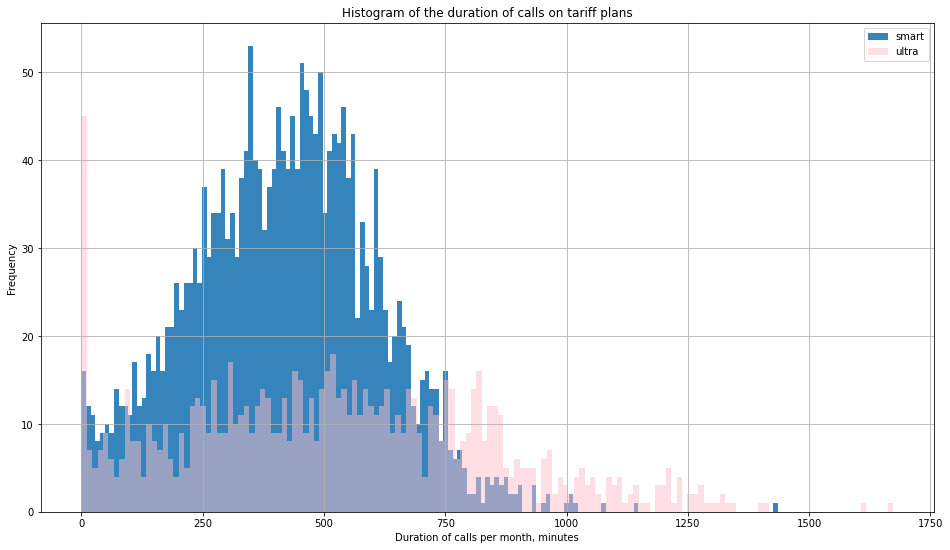

In [32]:
fig = plt.figure(figsize=(16,9))

df_alldata_smart=df_alldata.query('tariff=="smart"')
df_alldata_ultra=df_alldata.query('tariff=="ultra"')

df_alldata_smart['sum_duration'].plot(kind='hist', alpha=0.9, label='smart', bins=150, grid=True)
df_alldata_ultra['sum_duration'].plot(kind='hist',color='pink', alpha=0.5, label='ultra', bins=150, grid=True)

plt.title('Histogram of the duration of calls on tariff plans')
plt.ylabel('Frequency')
plt.xlabel('Duration of calls per month, minutes')
plt.legend() 
plt.show()

#build histograms of the distribution of the duration of calls for both tariffs

The distribution among the users of the "Smart" tariff has a close to normal, symmetrical appearance, for the users of the "Ultra" tariff - a shift to the left, to lower values.

In [33]:
df_alldata_smart['sum_duration'].describe()
#study descriptive statistics for users of the Smart tariff

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: sum_duration, dtype: float64

In [34]:
len(df_alldata_smart['user_id'].unique())

351

In [35]:
df_alldata_ultra['sum_duration'].describe()
#study descriptive statistics for users of the "Ultra" tariff

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: sum_duration, dtype: float64

In [36]:
len(df_alldata_ultra['user_id'].unique())

149

In [37]:
variance_smart = np.var(df_alldata_smart['sum_duration'], ddof=1)
print('Variance of call duration, Smart tariff', variance_smart)

variance_ultra = np.var(df_alldata_ultra['sum_duration'], ddof=1)
print('Variance of call duration, Ultra tariff', variance_ultra)

#since we do not have the general population at our disposal, but a part of it, we will specify ddof=1 in the parameters

Variance of call duration, Smart tariff 36281.39383644458
Variance of call duration, Ultra tariff 101052.49354928387


The smart tariff, as a more economical option, is much more popular in the current sample than ultra: 351 unique users versus 149. Considering this, the proportion of users who do not make/practically do not make calls looks about the same for the two tariffs.

The average and median call time per month deviates slightly for both tariffs. Users of the "Ultra" tariff use on average about 1.3 times more minutes per month than users of the "Smart" tariff.

The maximum call time per month in the "Ultra" tariff is slightly more than half of the minutes included in this package, whereas in the "Smart" tariff this indicator is 2.87 times more than the minimum package.

The first quartiles for both tariffs are almost the same: 282 and 282.5 minutes. Probably, users who don't talk much on the phone make their choice of tariff depending on the width of the Internet/SMS package.

### SMS

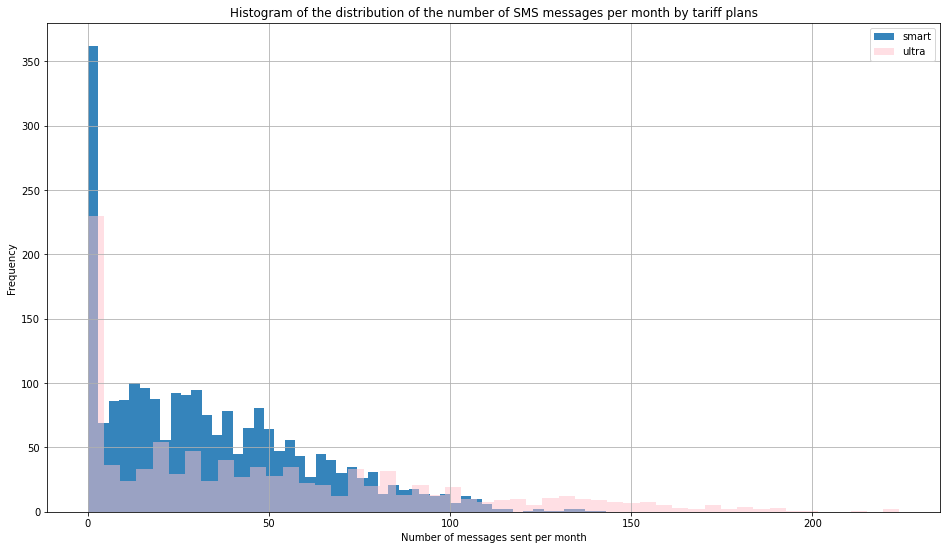

In [38]:
fig = plt.figure(figsize=(16,9))

df_alldata_smart['sms'].plot(kind='hist', alpha=0.9, label='smart', bins=50, grid=True)
df_alldata_ultra['sms'].plot(kind='hist',color='pink', alpha=0.5, label='ultra', bins=50, grid=True)

plt.title('Histogram of the distribution of the number of SMS messages per month by tariff plans')
plt.ylabel('Frequency')
plt.xlabel('Number of messages sent per month')
plt.legend() 
plt.show()

#building histograms of the distribution of the number of SMS sent per month for both tariffs

Both distributions have a similar distribution type with the location of most values in the range from 0 to 100. Only a small part of the Ultra tariff users send more than 200 messages per month out of 1000 possible in a package.

In [39]:
df_alldata_smart['sms'].describe()
#let's study descriptive statistics for users of the Smart tariff

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: sms, dtype: float64

The mean and median deviate slightly. The 3rd quartile is greater than the maximum allowable number of messages included in the basic package: in a quarter of cases, users had to purchase additional messages in a particular month. The sample is highly variable.

In [40]:
df_alldata_ultra['sms'].describe()
#let's study descriptive statistics for users of the "Ultra" tariff

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: sms, dtype: float64

The mean and median differ significantly. None of the users has ever exceeded the maximum allowable number of messages per month under the tariff plan. The sample is highly variable. On average, users of the "Ultra" tariff send 48 messages per month, and users of the "Smart" tariff - 33, i.e. 45% more.

### Internet traffic

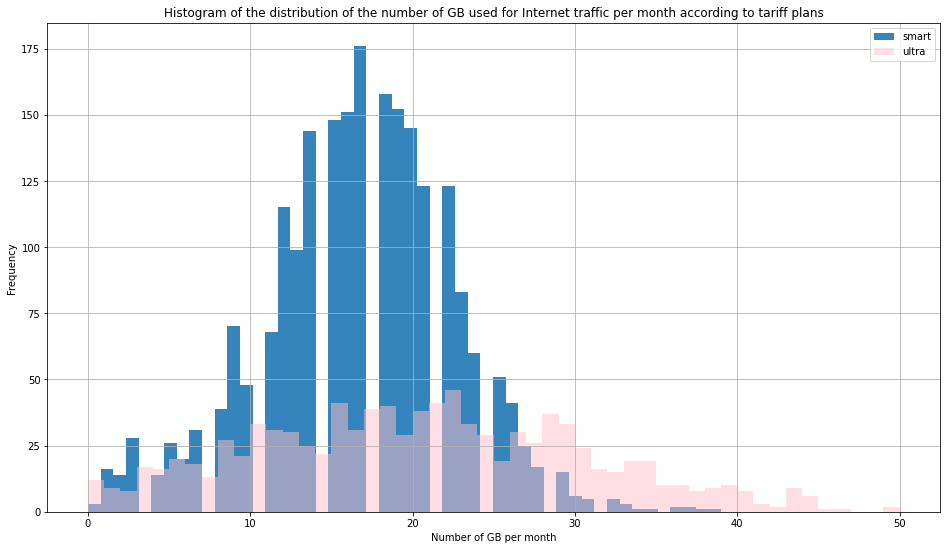

In [41]:
fig = plt.figure(figsize=(16,9))

df_alldata_smart['sum_gb_used'].plot(kind='hist', alpha=0.9, label='smart', bins=50, grid=True)
df_alldata_ultra['sum_gb_used'].plot(kind='hist',color='pink', alpha=0.5, label='ultra', bins=50, grid=True)

plt.title('Histogram of the distribution of the number of GB used for Internet traffic per month according to tariff plans')
plt.ylabel('Frequency')
plt.xlabel('Number of GB per month')
plt.legend() 
plt.show()

#build histograms of the distribution of Internet traffic usage per month for both tariffs

The distributions are symmetrical for both tariffs, but for users of the "Ultra" tariff it is flatter. For users of the Smart tariff, most of the values are close to the median.

In [42]:
df_alldata_smart['sum_gb_used'].describe()
#let's study descriptive statistics for users of the Smart tariff

count    2230.000000
mean       16.688341
std         5.886713
min         0.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        39.000000
Name: sum_gb_used, dtype: float64

In [43]:
df_alldata_ultra['sum_gb_used'].describe()
#let's study descriptive statistics for users of the "Ultra" tariff

count    986.000000
mean      19.945233
std       10.115829
min        0.000000
25%       12.000000
50%       20.000000
75%       27.000000
max       50.000000
Name: sum_gb_used, dtype: float64

The 1st, 2nd and 3rd quartiles are similar in both distributions. Judging by the standard deviation and distribution histograms, the use of the Internet for the "Ultra" tariff is more variable. In more than half of the cases under consideration, users of the "Smart" tariff went beyond the minimum package for Internet traffic (15 GB), we do not observe this for users of the "Ultra" tariff. The median and average deviate slightly from each other in both tariffs. On average, users of the "Ultra" tariff need 20 GB of Internet traffic per month, and users of the "Smart" tariff - 17.

### Revenue

Let's look at the available data, how revenue changes per month for each user, depending on the tariff.

In [44]:
df_alldata_smart['revenue'].describe()

count    2230.000000
mean     1224.798655
std       794.203978
min       550.000000
25%       550.000000
50%       950.000000
75%      1665.000000
max      6770.000000
Name: revenue, dtype: float64

In [45]:
df_alldata_ultra['revenue'].describe()

count     986.000000
mean     2066.683570
std       371.760874
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

Judging by the difference between the average and median in revenue for the Smart tariff, the contribution of users who go beyond the tariff package is significant. In the "Ultra" tariff, on the contrary, the average is close to the minimum subscription fee.

In [46]:
df_alldata_smart_extra = df_alldata_smart.query('revenue > 550')
df_alldata_ultra_extra = df_alldata_ultra.query('revenue > 1950')

share_smart = len(df_alldata_smart_extra)/len(df_alldata_smart)
share_ultra = len(df_alldata_ultra_extra)/len(df_alldata_ultra)

print('The share of Smart tariff users who have gone beyond the package', '{:.1%}'.format(share_smart))
print('The share of Ultra tariff users who have gone beyond the package', '{:.1%}'.format(share_ultra))

#let's look at the available samples, in how many cases relative to the total number of users buy additional services at different rates

The share of Smart tariff users who have gone beyond the package 72.4%
The share of Ultra tariff users who have gone beyond the package 13.4%


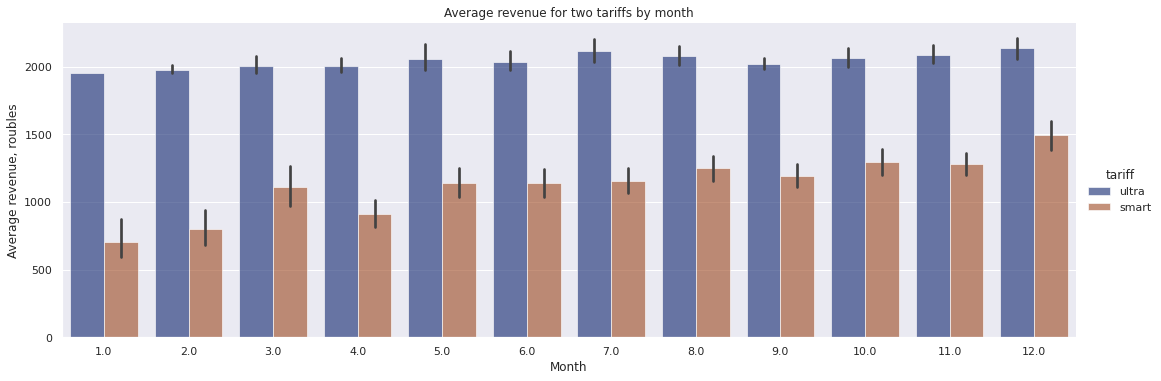

In [47]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.catplot(data = df_alldata, kind = "bar", x = "month", y = "revenue", hue="tariff", palette="dark", alpha=.6, aspect=3
)

plt.title('Average revenue for two tariffs by month')
plt.ylabel('Average revenue, roubles')
plt.xlabel('Month')
plt.show()


Revenue under the "Ultra" tariff is on average close to the subscription fee for this package. 

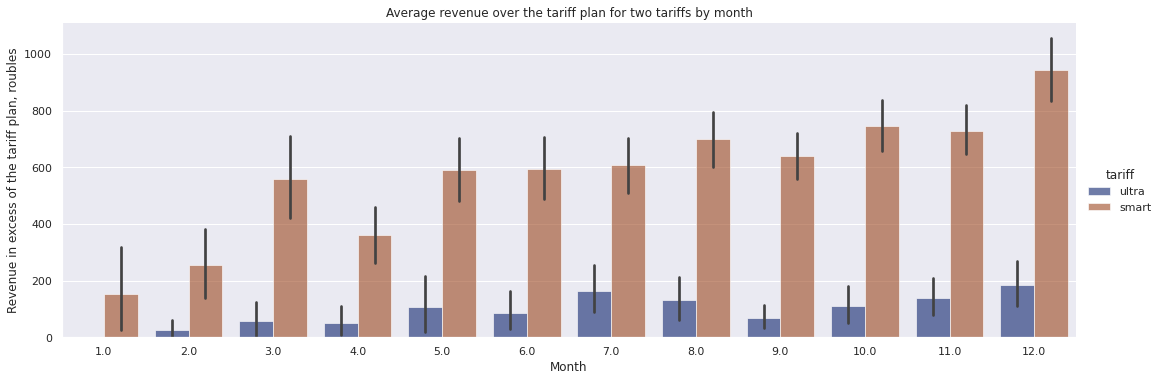

In [48]:
df_alldata['extra_revenue'] = df_alldata['revenue'] - df_alldata['rub_monthly_fee']
sns.set(rc={'figure.figsize':(16, 9)})
sns.catplot(data = df_alldata, kind = "bar", x = "month", y = "extra_revenue", hue="tariff", palette="dark", alpha=.6, aspect=3
)

plt.title('Average revenue over the tariff plan for two tariffs by month')
plt.ylabel('Revenue in excess of the tariff plan, roubles')
plt.xlabel('Month')
plt.show()

Users of the Smart tariff have to buy significantly more extras. services. Perhaps the fact of additional purchase of the additional tariff services affect the rate of user outflow and it is worth conducting additional research on this issue (in the existing users who have disconnected from the tariff, only 38 out of 500, so no analysis was carried out).

In [49]:
df_alldata['extrarevenue_sms'] = df_alldata['rub_per_message'] * df_alldata['extra_messages']
df_alldata['extrarevenue_internet'] = df_alldata['rub_per_gb'] * df_alldata['extra_gb']
df_alldata['extrarevenue_calls'] = df_alldata['rub_per_minute'] * df_alldata['extra_minutes']

with pd.option_context('display.float_format', '{:.2f}'.format):
    display(df_alldata.groupby('tariff').agg(Average_SMS_revenue_over_the_tariff_plan=('extrarevenue_sms','mean')))
    display(df_alldata.groupby('tariff').agg(Average_call_revenue_over_the_tariff_plan=('extrarevenue_calls','mean')))
    display(df_alldata.groupby('tariff').agg(Average_internet_revenue_over_the_tariff_plan=('extrarevenue_internet','mean')))

#let's calculate the revenue in roubles in excess of the tariff plan for each type of service

,Average_SMS_revenue_over_the_tariff_plan
tariff,
smart,17.39
ultra,0.00


,Average_call_revenue_over_the_tariff_plan
tariff,
smart,124.76
ultra,0.00


,Average_internet_revenue_over_the_tariff_plan
tariff,
smart,532.65
ultra,116.68


As noted above, users of the "Ultra" tariff do not go beyond the tariff package by SMS and calls. In terms of the "Smart" tariff, on average, it was possible to collect an amount for the Internet from the studied users, close to the tariff fee, i.e. double the revenue for the user twice.

### Conclusion

Despite the fact that users of the "Ultra" tariff do not go beyond the tariff package, the average monthly revenue for users from this tariff looks more than the average monthly revenue for the "Smart" tariff. We are dealing with a limited sample of users, so we will check these statements using statistical methods. We will also see if there is a difference in average monthly revenue between the largest region represented in the dataset - Moscow, and other regions.

## Testing the statistical hypotheses

### The average revenue of users of the "Ultra" and "Smart" tariffs differ

The general aggregates are revenue for all users of the "Smart" tariff and revenue for all users of the "Ultra" tariff. Since the parameters of these tariffs are completely different, in the statistical test we will specify the equal_var = False parameter for the st.ttest_ind method.

The null hypothesis is that the average revenue under the "Ultra" tariff is equal to the average revenue under the "Smart" tariff. Alternative - the average revenue is not equal. The statistical significance level is defined as 5% as the most common option for most tests.

In [50]:
sample_1 = df_alldata_smart['revenue']
sample_2 = df_alldata_ultra['revenue']


results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Cannot reject the null hypothesis')

p-value: 5.153021355031254e-295
Reject the null hypothesis


Based on the available data, we do not reject the assumption that the average revenue for users of the two tariffs differ.

### The average revenue of users from Moscow differs from the revenue of users from other regions

General populations are the revenue for all users from Moscow and the revenue for all users from regions other than Moscow.

The null hypothesis is that the average revenue for users from Moscow is equal to the average revenue for users from the regions. Alternative - the average revenue is not equal. The statistical significance level is defined as 5% as the most common option for most tests.

In [51]:
df_alldata_Moscow = df_alldata.query('city == "Москва"')
df_alldata_province = df_alldata.query('city != "Москва"')

sample_1 = df_alldata_Moscow['revenue']
sample_2 = df_alldata_province['revenue']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05  
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Cannot reject the null hypothesis')

p-value: 0.4398885916159705
Cannot reject the null hypothesis


Based on the available data, it is possible to reject the assumption that the average revenue for users from Moscow and the regions differ, since with a probability of 44% such differences can be obtained randomly. This is clearly too high a probability to conclude that there is a significant difference between the averages.

### Conclusion

Probably, the fact that the user has chosen the tariff has more influence on the final revenue than what region the client came from.

## General conclusion

The average revenue for the Smart economy tariff (1,225 roubles) is more than the subscription fee for this tariff (550 roubles) by 675 roubles, i.e. users are willing to pay a large amount as a subscription fee. At the moment, the "Ultra" tariff is more profitable for the company, but it is worth testing an intermediate solution between the two tariffs, where a fixed package would include from 15 to 30 GB of Internet traffic, and less SMS than in the "Ultra" package. 